In [1]:
import glob
import re
import pandas
import time

In [2]:
logfiles = [ 'backprop.log',
         'dgl.log',
         'dni.log',
         'cdni.log'
]
names = { logfiles[0]:'Backprop',
         logfiles[1]:'DGL',
         logfiles[2]:'DNI',
         logfiles[3]:'cDNI'
        }

In [3]:
with open(logfiles[0], 'r') as f:
    c = f.read()

In [4]:
linepattern = r'n\: (\d{1,2}), epoch (\d{1,4}), loss\: (.*), train top1\:(.*) test top1\:(.*)'
l = "n: 3, epoch 143, loss: 0.51295, train top1:82.586 test top1:79.7"
mm = re.search(linepattern, l)
mm.groups()

('3', '143', '0.51295', '82.586', '79.7')

In [5]:
line_field_names = [
    ('n', int),
    ('epoch', int),
    ('loss', float),
    ('train acc', float),
    ('Test Acc.', float)
]
line_descriptor_dicts = []
for logfile in logfiles:
    with open(logfile, 'r') as f:
        for line in f:
            match = re.search(linepattern, line)
            if match is not None:
                dd = {field_name: field_dtype(value) for (field_name, field_dtype), value
                             in zip(line_field_names, match.groups())}
                dd['method'] = names[logfile]
                line_descriptor_dicts.append(dd)
line_df = pandas.DataFrame.from_records(line_descriptor_dicts)

(0, 1500)

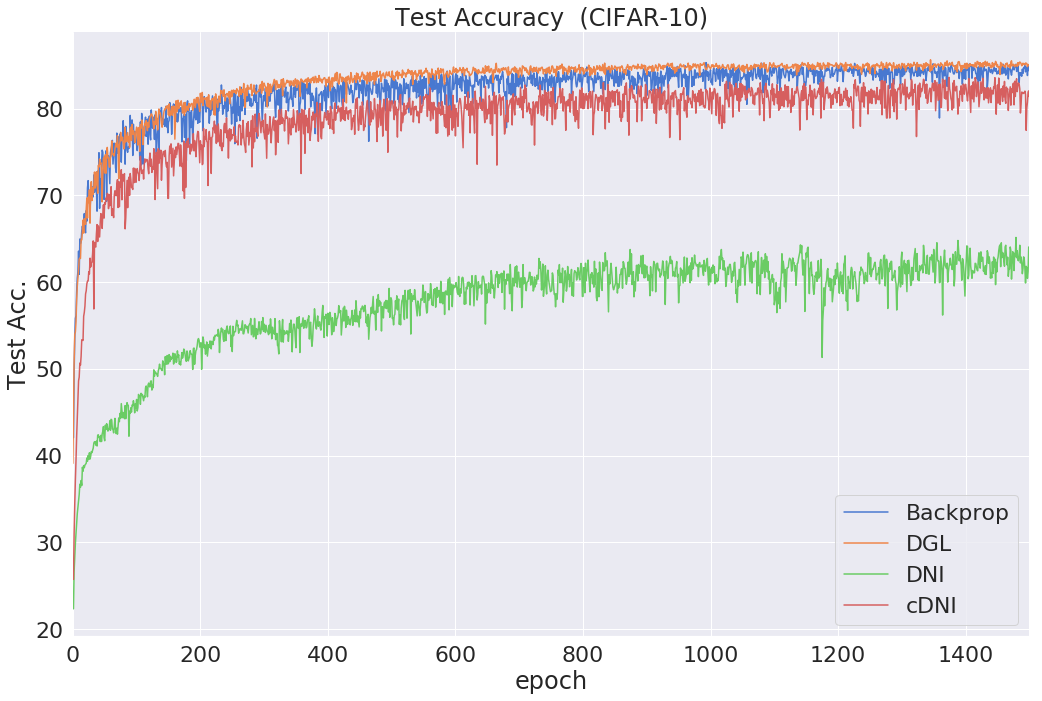

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#sns.set_context("paper")
sns.set(style="dark")
sns.set(font_scale=2)
# Plot the responses for different events and regions
g = sns.relplot(x="epoch", y='Test Acc.', 
                hue="method", kind="line", height=10,aspect=1.5, palette="muted",
                data=line_df,legend=False)
g.despine(left=True)
plt.legend(['Backprop','DGL','DNI','cDNI'],loc='lower right')
plt.title('Test Accuracy  (CIFAR-10)')
#handles, _ = ax.get_legend_handles_labels()
#ax.legend.loc='upper right'
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
plt.xlim(0,1500)

(0, 1500)

<Figure size 720x720 with 0 Axes>

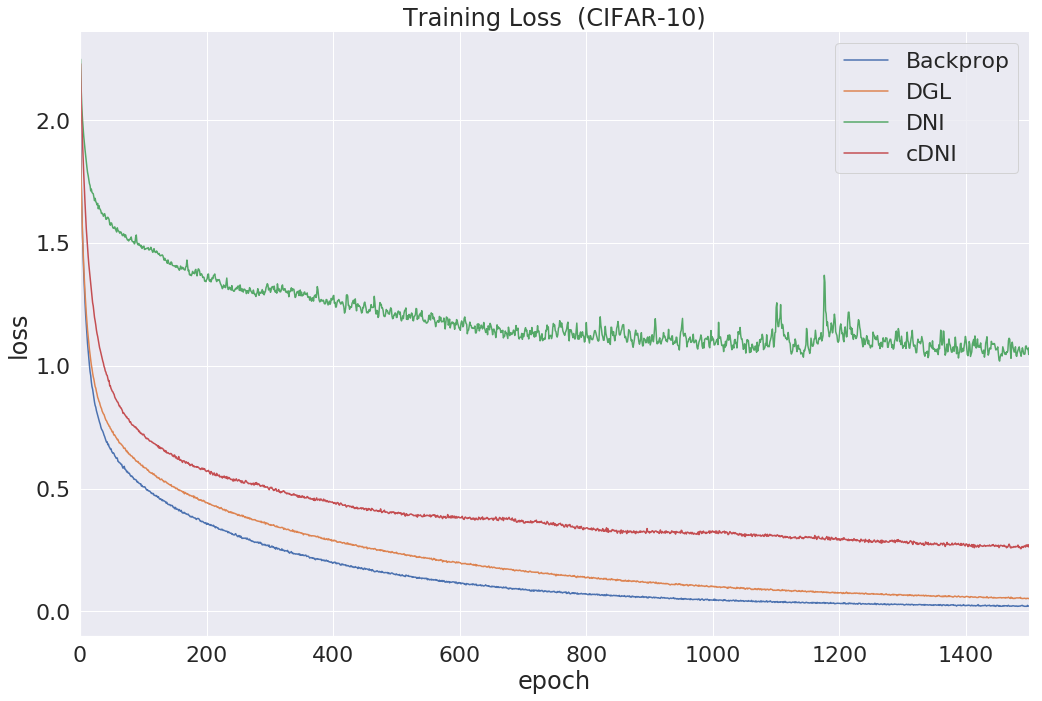

In [9]:
plt.figure(figsize=(10, 10))
import seaborn as sns
sns.set(style="dark")
sns.set(font_scale=2)

# Plot the responses for different events and regions
sns.relplot(x="epoch", y="loss", hue="method", height=10,aspect=1.5,legend=False,
            kind="line", data=line_df)
g.despine(left=True)
plt.legend(['Backprop','DGL','DNI','cDNI'],loc='upper right')
plt.title('Training Loss  (CIFAR-10)')
#handles, _ = ax.get_legend_handles_labels()
#ax.legend.loc='upper right'
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
plt.xlim(0,1500)